In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from botnet_detection import summary_of_detection, dl_test_dict, test_dict, dl_train, rf_train, dt_train, get_roc_metrics, get_specific_features_from
from utils import best_features
from plot_features import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from summarizer import Summarizer
features = Summarizer().features
attack_types = ['spam', 'irc']
files = ['minute_aggregated/{}-1.0s.featureset.csv'.format(attack) for attack in attack_types]
files += ['minute_aggregated/ddos-0.01s.featureset.csv']
attack_types.append('ddos')
# files += ['minute_aggregated/p2p-120.0s.featureset.csv']

Using TensorFlow backend.


# Initial confusion matrices

Results for minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9928, Recall: 0.9929, Precision: 0.9951, f1_score: 0.9940 



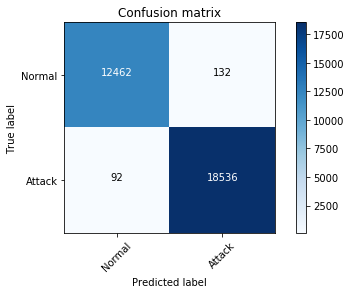

Results for minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.9897, Recall: 0.9891, Precision: 0.9900, f1_score: 0.9895 



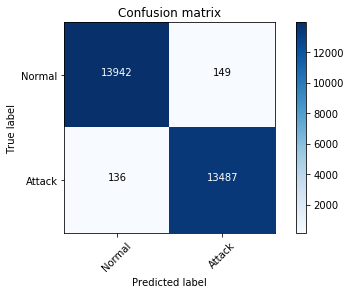

Results for minute_aggregated/ddos-1.0s.featureset.csv
Accuracy: 0.9801, Recall: 0.9841, Precision: 0.9378, f1_score: 0.9604 



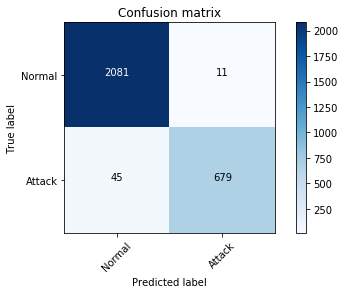

In [49]:
attack_types = ['spam', 'irc', 'ddos']
files = ['minute_aggregated/{}-1.0s.featureset.csv'.format(attack) for attack in attack_types]
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain, trees=10)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Deep Learning

Results for minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9359, Recall: 0.9197, Precision: 0.9779, f1_score: 0.9479 



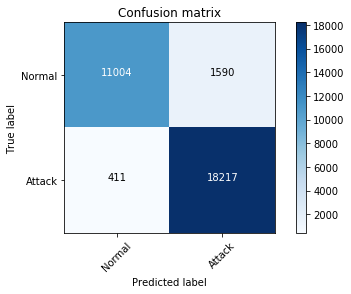

Results for minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.8997, Recall: 0.9283, Precision: 0.8624, f1_score: 0.8942 



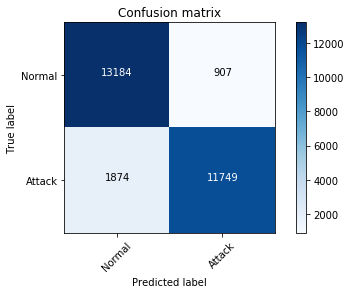

Results for minute_aggregated/ddos-1.0s.featureset.csv
Accuracy: 0.7255, Recall: 0.4789, Precision: 0.7680, f1_score: 0.5899 



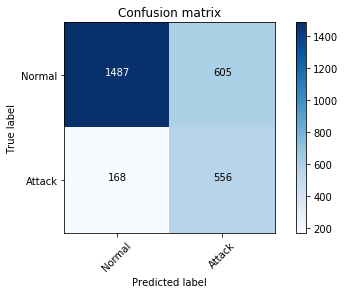

In [50]:
print('For Deep Learning\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

# Comparing tree counts for random forest for each attack

With ALL


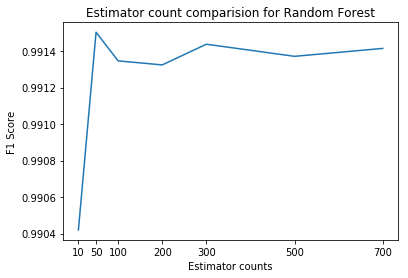

In [5]:
# For testing optimal amount of Random Forest estimators.
from botnet_detection import rf_compare_estimator_counts, get_specific_features_from
from plot_features import plot_rf_estimators
from summarizer import Summarizer
features = Summarizer().features
print('With ALL')
plot_rf_estimators(rf_compare_estimator_counts(*get_specific_features_from('minute_aggregated/all-1.0s.featureset.csv', features)), 'Estimator count comparision for Random Forest')

## Final Metrics

In [ ]:
# Random Forest
import matplotlib.pyplot as plt
metrics = []
i = 1
plt.figure(figsize=(12, 7))

plt.ylabel('True label')
plt.xlabel('Predicted label')

for j, f in enumerate(files):
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain, trees=50)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    line = ''
    for key in ['accuracy', 'recall', 'precision', 'f1_score']:
        line += '{:.3f},'.format(results[key])
    metrics.append(line[:-1])
    plt.subplot(2, 3, i)
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'], title='Random Forest on {}'.format(attack_types[j].upper()))
    i += 1

j = i
for i, f in enumerate(files):
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    line = ''
    for key in ['accuracy', 'recall', 'precision', 'f1_score']:
        line += '{:.3f},'.format(results[key])
    metrics.append(line)
    print(j)
    plt.subplot(2, 3, j)
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'], title="Deep Learning on {}".format(attack_types[i].upper()))
    j += 1

for metric in metrics:
    print(metric)
    
plt.show()

Results for minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9929, Recall: 0.9925, Precision: 0.9956, f1_score: 0.9941 

Results for minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.9915, Recall: 0.9890, Precision: 0.9938, f1_score: 0.9914 

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9991, Recall: 0.9993, Precision: 0.9994, f1_score: 0.9993 

Results for minute_aggregated/spam-1.0s.featureset.csv


For Deep Learning

Results for minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9069, Recall: 0.9615, Precision: 0.8791, f1_score: 0.9185 



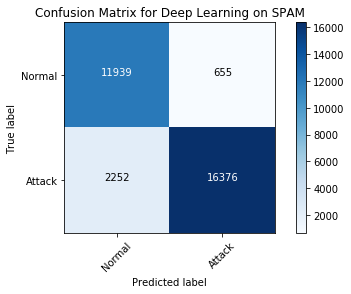

Results for minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.8952, Recall: 0.9246, Precision: 0.8566, f1_score: 0.8893 



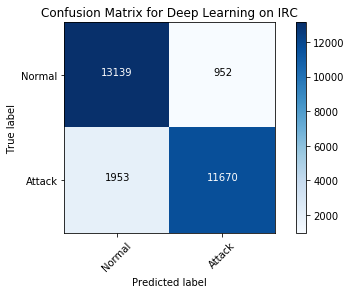

Results for minute_aggregated/all-1.0s.featureset.csv
Accuracy: 0.9181, Recall: 0.9269, Precision: 0.9332, f1_score: 0.9300 



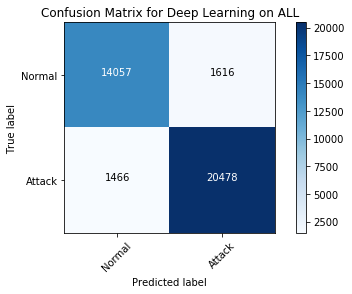

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9421, Recall: 0.9464, Precision: 0.9654, f1_score: 0.9558 



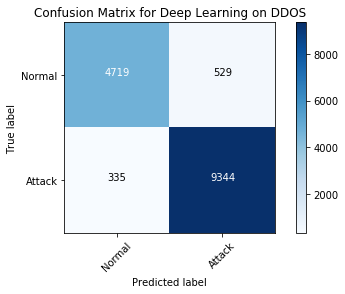

0.907,0.962,0.879,0.918,
0.895,0.925,0.857,0.889,
0.918,0.927,0.933,0.930,
0.942,0.946,0.965,0.956,


In [32]:
print('For Deep Learning\n')
metrics = []
for i, f in enumerate(files):
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    line = ''
    for key in ['accuracy', 'recall', 'precision', 'f1_score']:
        line += '{:.3f},'.format(results[key])
    metrics.append(line)
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'], title="Confusion Matrix for Deep Learning on {}".format(attack_types[i].upper()))
    
for metric in metrics:
    print(metric)

## Models with changing the proba threshold

minute_aggregated/all-1.0s.featureset.csv
Accuracy: 0.9872, Recall: 0.9807, Precision: 0.9977, f1_score: 0.9891 



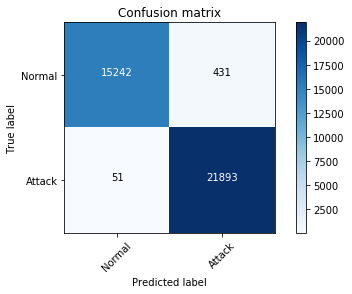

minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9915, Recall: 0.9879, Precision: 0.9980, f1_score: 0.9929 



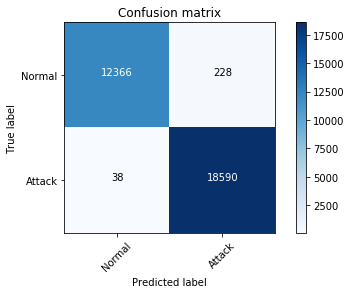

minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.9887, Recall: 0.9799, Precision: 0.9974, f1_score: 0.9886 



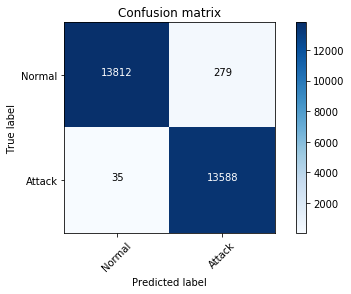

minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9987, Recall: 0.9981, Precision: 0.9999, f1_score: 0.9990 



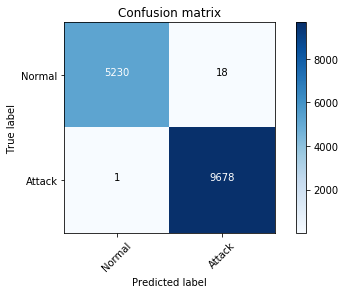

In [33]:
# Probability manipulation
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict, test_proba
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
attacks = ['spam', 'irc', 'all', 'ddos']
files += ['minute_aggregated/{}-1.0s.featureset.csv'.format(attack) for attack in attacks]
files[-1] = 'minute_aggregated/ddos-0.01s.featureset.csv'
for i, f in enumerate(files):
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain, trees=50)
    results = test_proba(clf, xtest, ytest, normal_thresh=.7)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'] title='Confusion Matrix with probability tuning on {}'.format(attacks[i].upper()))

minute_aggregated/all-1.0s.featureset.csv
Accuracy: 0.9089, Recall: 0.9207, Precision: 0.9233, f1_score: 0.9220 



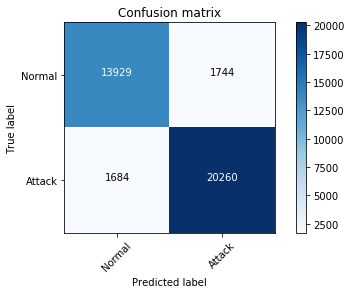

minute_aggregated/spam-1.0s.featureset.csv
Accuracy: 0.9467, Recall: 0.9377, Precision: 0.9755, f1_score: 0.9562 



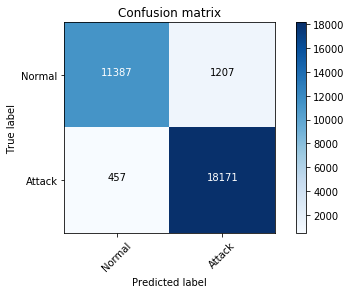

minute_aggregated/irc-1.0s.featureset.csv
Accuracy: 0.8924, Recall: 0.8631, Precision: 0.9283, f1_score: 0.8945 



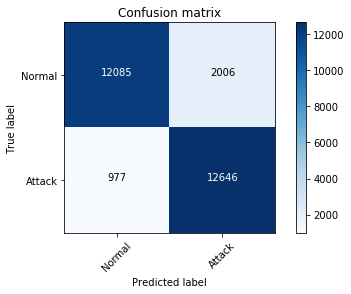

minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.8877, Recall: 0.8659, Precision: 0.9784, f1_score: 0.9187 



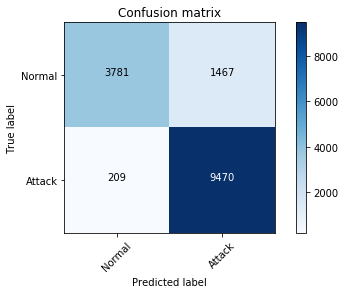

0.909,0.921,0.923,0.922,
0.947,0.938,0.975,0.956,
0.892,0.863,0.928,0.895,
0.888,0.866,0.978,0.919,


In [48]:
# Probability manipulation with Deep Learning
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict, dl_test_proba
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
attacks = ['spam', 'irc', 'ddos']
files = ['minute_aggregated/all-1.0s.featureset.csv']
files += ['minute_aggregated/{}-1.0s.featureset.csv'.format(attack) for attack in attacks]
files[-1] = 'minute_aggregated/ddos-0.01s.featureset.csv'
metrics = []
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_proba(clf, xtest, ytest, .25)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    line = ''
    for key in ['accuracy', 'recall', 'precision', 'f1_score']:
        line += '{:.3f},'.format(results[key])
    metrics.append(line)
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])
    
for metric in metrics:
    print(metric)